### Introduction to Naive Bayes

The Naive Bayes classification machine learning model uses Bayes Theorem to classify data points into one of several labels. When multiple features are used, the model calculates the probability of each label being the true label based on the conditional probability from the state of the feature. This is done for each of the features present, and the model assigns the label with the highest probability.

The Naive Bayes model operates under the assumption that the effects of the different features are independent of one another.

Given my prior hypothesis that certain team evaluation metrics during powerplays may be more predictive of regular season team success, I am looking to use Naive Bayes classification to determine which features are most predictive and then determine if these features during power play situations can be more accurately used to train a ML model to predict playoff berths then features from regular 5 on 5 game play.

### Prepare Data for Naive Bayes

I prepared the team powerplay data for Naive Bayes classification in an R file linked here. Team data from the 2018-2019, 2020-2021, 2021-2022, and 2022-2023 seasons were combined and the desired features were subsetted from the greater dataset. An additional variable was added for whether or not the team made the playoffs that season and all numerical metrics were normalized. Finally, all non-numerical variables except the playoff variable were removed.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("team_pp_data_clean.csv")
print(df.shape)

label = df['playoff'].copy()
df=df.drop(columns=['Unnamed: 0','playoff'])
features=df.columns
feature_matrix = df[features].copy()



(126, 10)


In [3]:
df.head()

,xGoalsPercentage,corsiPercentage,shotAttemptsFor,xGoalsFor,faceOffsWonFor,takeawaysFor,giveawaysFor,hitsFor
0,1.006796,1.022595,1.313719,1.140674,1.235730,1.745308,0.913171,1.510141
1,1.099375,1.057456,1.288898,1.901734,1.235730,1.689008,1.229268,1.239090
2,0.914217,0.964493,0.980414,0.921767,1.146758,1.126005,1.194146,0.851875
3,0.972079,1.022595,1.116927,0.934351,1.003413,0.731903,0.878049,0.658267
4,0.948935,0.987734,1.306627,1.353550,1.290102,2.083110,1.545366,1.858636


In [4]:
from sklearn.model_selection import train_test_split

X = feature_matrix
y= label

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=100
)


After loading the pre-prepared dataset, I used sklearn to split the dataset into a training set and a test set with an 80-20 split. It is important to keep a portion of the data aside to test the accuracy of the model on.

### Feature Selection

Feature selection is a process by which only the most predictive and least correlated features are used to train a model in order to maximize accuracy.

To find the subset of features that result in the highest accuracy score, I will find every possible combination of the seven features and calculate a metric to evaluate their correlation coefficients.

In [5]:
from itertools import chain, combinations

#list all possible feature subsets
feature_subsets = list(features)
feature_subset=chain.from_iterable(combinations(feature_subsets,r) for r in range(len(feature_subsets)+1))
feature_subset=list(feature_subset)




In [6]:
X_train_df=pd.DataFrame(X_train, columns=features)
X_test_df=pd.DataFrame(X_test, columns=features)

from scipy.stats import spearmanr
import itertools

#calculate spearman correlation coefficients for each subset
def mean_xx_corr(x_df):
    df_colnames=x_df.columns
    xx_corrs=[]

    df_colname_pairs=itertools.combinations(df_colnames, 2)
    for colname1, colname2 in df_colname_pairs:
        col1=x_df[colname1]
        col2=x_df[colname2]
        xx_pair_corr=spearmanr(col1, col2).stastic
        xx_corrs.append(xx_pair_corr)

    return np.mean(xx_corrs)


def compute_mean_xy_corr(x_df, y_vec):
    df_colnames=x_df.columns
    xy_corrs=[]
    for colname in df_colnames:
        x_col = x_df[colname]
        xy_pair_corr = spearmanr(x_col, y_vec)
        xy_corrs.append(xy_pair_corr)

    return np.mean(xy_corrs)


### Naive Bayes

The first NB model I used incorporated the data from all seven features. The GaussianNB model from the sklearn package was trained on the previously partitioned train data.

0.8076923076923077
0.809839283523494


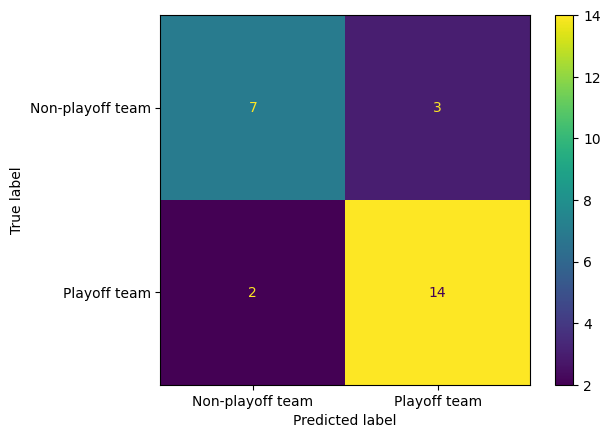

In [7]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


y_pred=model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print(accuracy)
print(f1)

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-playoff team","Playoff team"])
disp.plot()



After training on the training data, I had the model predict whether the records in the test data were playoff teams based on their features. The accuracy and f1 scores were both around 80% which is pretty high and the confusion matrix shows that the model was equally proficient at predicting teams to make the playoffs as they are at predicting teams to miss the playoffs.

Further, I would like to test other subsets of features to find a more accurate model. And then carry out the same process to evaluate models based on regular 5 on 5 play and compare the accuracy of these two models.

For now, it is clear to see that player evaluation metrics during power plays can be used to predict regular season success.

In [8]:
df_train = pd.read_csv('Train.csv', delimiter=',', quotechar='"')
df_test = pd.read_csv('Test.csv', delimiter=',', quotechar='"')
df_sample = pd.read_csv('Sample_submission.csv', delimiter=',', quotechar='"')

In [9]:
df_train.head(12)

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos
5,Steve Carell comes into his own in his first s...,pos
6,I'm only going to write more because it's requ...,neg
7,"OK, it was a ""risky"" move to rent this flick, ...",neg
8,"Cannibalism, a pair of cinematic references to...",pos
9,This is one of the great modern kung fu films....,pos


In [10]:
df_sample.tail(3)

,Id,label
9997,9997,pos
9998,9998,pos
9999,9999,pos


In [11]:
df_test.head(3)

,review
0,Remember those old kung fu movies we used to w...
1,This movie is another one on my List of Movies...
2,How in the world does a thing like this get in...


In [12]:
train_reviews = df_train.review
test_reviews = df_test.review
labels = df_train.label

In [13]:
train_reviews[0]

"mature intelligent and highly charged melodrama unbelivebly filmed in China in 1948. wei wei's stunning performance as the catylast in a love triangle is simply stunning if you have the oppurunity to see this magnificent film take it"

In [14]:
!pip install nltk

In [15]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Ensure NLTK resources are available
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def clean_view(text):
    ps = PorterStemmer()
    tokenizer = RegexpTokenizer('[a-zA-Z]+')
    stopword = set(stopwords.words('english'))
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    new_token = [ps.stem(token) for token in tokens if token not in stopword] # stemming and stopword removing
    return ' '.join(new_token)

In [17]:
clean_train = [clean_view(each) for each in train_reviews]

In [18]:
clean_test = [clean_view(each) for each in test_reviews]

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(2, 2))
tf.fit(clean_train)

TfidfVectorizer(ngram_range=(2, 2))

In [20]:
x_train = tf.transform(clean_train)
x_test = tf.transform(clean_test)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(labels)

# Naive Bayes for textual data

In [22]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y)

MultinomialNB()

In [24]:
model.score(x_train, y)

0.996125

In [25]:
pred = model.predict(x_test)

### The evaluation metrics:

- **Accuracy**: Measures the correct prediction ratio. Effective for balanced classes, less so for imbalanced ones.
- **Precision**: Proportion of true positives in positive predictions. Key when false positives have high costs.
- **Recall (Sensitivity)**: Proportion of actual positives correctly identified. Critical when false negatives carry significant risks.
- **F1 Score**: Harmonic mean of precision and recall. Ideal for balancing these metrics, particularly in imbalanced datasets.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy=accuracy_score(y_pred, y_test)

f1 = f1_score(y_pred, y_test, average="weighted")

precision = precision_score(y_test, y_pred, average="weighted")

recall = recall_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-playoff team","Playoff team"])
disp.plot()

### Overfitting and under-fitting.

Overfitting and underfitting are the two biggest causes for poor performance of machine learning algorithms. 

Overfitting refers to a model that models fit training data too well. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Underfitting refers to a model that can neither fit the training data nor generalize to new data. An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Naive Bayes classifiers are less prone to overfitting, especially when dealing with high-dimensional data. Improving the set of features, such as using different text representation techniques for text classification (like TF-IDF), can help the model capture more information, reducing underfitting.


### Model’s performance (need revision).

- **Accuracy (0.504)**: Marginally better than random guessing. Effective if baseline accuracy is low.
- **Precision (0.5039)**: Correct half the time on positive predictions. Indicates average reliability.
- **Recall (0.504)**: Identifies 50.4% of actual positives. Moderate performance in detecting true cases.
- **F1 Score (0.5042)**: Harmonic mean of precision and recall, indicating average balance.